In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from data_collection import Collection1, Collection2

## Data Collection

In [13]:
# [X_train,Y_train,X_test,ID_test] = Collection1.parse_telecom_data(filename_train='train.csv',filename_test='test.csv')

[X_train,Y_train,X_test,ID_test] = Collection2.parse_telecom_data(filename_train='train.csv',filename_test='test.csv')

## Grad Boosting Case Study

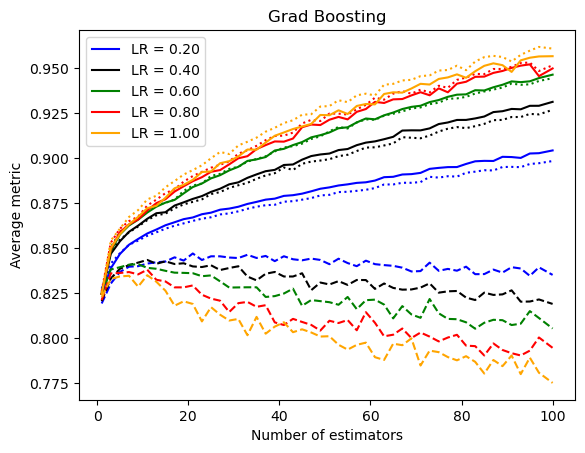

In [17]:
# Grad boosting case study
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True)    

n_est_list = np.linspace(1,100,50, dtype='int')
learn_rate_list = [.2,.4,.6,.8,1]
c = ['b', 'k', 'g', 'r', 'orange']

fig, ax = plt.subplots()

for i,lr in enumerate(learn_rate_list):
    avg_train_metric = np.zeros((len(n_est_list),))
    avg_val_metric = np.zeros((len(n_est_list),))
    avg_full_metric = np.zeros((len(n_est_list),))
    for j,n_est in enumerate(n_est_list):
        train_Metric = 0
        val_Metric = 0
        y_train_prob_avg = 0
        for train_idx, val_idx in kf.split(X_train[:,0]):
            x_train, x_val = X_train[train_idx,:], X_train[val_idx,:]
            y_train, y_val = Y_train[train_idx], Y_train[val_idx]

            clf = GradientBoostingClassifier(n_estimators=n_est, learning_rate=lr)
            clf.fit(x_train, y_train.flatten())
            
            y_train_prob = clf.predict_proba(x_train)
            thisMetric = metrics.roc_auc_score(y_train, y_train_prob[:,1])
            train_Metric += thisMetric

            y_train_prob = clf.predict_proba(x_val)
            thisMetric = metrics.roc_auc_score(y_val, y_train_prob[:,1])
            val_Metric += thisMetric
            
            y_train_prob = clf.predict_proba(X_train)
            y_train_prob_avg += y_train_prob[:,1]

        avg_train_metric[j] = train_Metric/n_folds
        avg_val_metric[j] = val_Metric/n_folds
        avg_full_metric[j] = metrics.roc_auc_score(Y_train, y_train_prob_avg/n_folds)

    ax.plot(n_est_list,avg_train_metric, color=c[i], label=f'LR = {lr:0.2f}')
    ax.plot(n_est_list,avg_val_metric, color=c[i], linestyle='--')
    # ax.plot(n_est_list,avg_full_metric, color=c[i], linestyle=':')
    ax.set_xlabel('Number of estimators')
    ax.set_ylabel('Average metric')
    plt.title('Grad Boosting')

plt.legend()
plt.show()

## Grad Boosting Collection

In [14]:
n_folds = 5
kf = KFold(n_splits=n_folds)    
i = 0
train_Metric = 0
val_Metric = 0
full_Metric = 0
prob_avg = 0
for train_idx, val_idx in kf.split(X_train[:,0]):
    print(f'--------------- k-fold {i} ---------------')
    x_train, x_val = X_train[train_idx,:], X_train[val_idx,:]
    y_train, y_val = Y_train[train_idx], Y_train[val_idx]

    clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1)
    clf.fit(x_train, y_train.flatten())
    
    y_train_prob = clf.predict_proba(x_train)
    thisMetric = metrics.roc_auc_score(y_train, y_train_prob[:,1])
    train_Metric += thisMetric
    print("Training metric: ",thisMetric)

    y_train_prob = clf.predict_proba(x_val)
    thisMetric = metrics.roc_auc_score(y_val, y_train_prob[:,1])
    val_Metric += thisMetric
    print("Testing metric: ",thisMetric)

    y_train_prob = clf.predict_proba(X_test)
    prob_avg += y_train_prob[:,1]
    print(' ')

    i += 1

print(f'Average training metric: {train_Metric/n_folds}')
print(f'Average testing metric: {val_Metric/n_folds}')
print(f'Average full metric: {full_Metric/n_folds}')

y_test_prob = prob_avg/n_folds
thisData = np.concatenate((ID_test, np.reshape(y_test_prob,(-1,1))), axis=1)
thisLabel = ['ID','TARGET']
y_test_prob_pd = pd.DataFrame(data=thisData,columns=thisLabel)
fname_submit = 'test_submission_Ethan.csv'
y_test_prob_pd.to_csv(fname_submit,index=False)
    

--------------- k-fold 0 ---------------
Training metric:  0.9594490311502456
Testing metric:  0.7741903689101661
 
--------------- k-fold 1 ---------------
Training metric:  0.9569507992995538
Testing metric:  0.7874801506283744
 
--------------- k-fold 2 ---------------
Training metric:  0.9442481230224129
Testing metric:  0.7922735275288093
 
--------------- k-fold 3 ---------------
Training metric:  0.9556551997925
Testing metric:  0.7790897168726646
 
--------------- k-fold 4 ---------------
Training metric:  0.9578878575294345
Testing metric:  0.7766934199431623
 
Average training metric: 0.9548382021588294
Average testing metric: 0.7819454367766354
Average full metric: 0.0
